### Подключаем пакет

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## Кейс "чаевые"
### Загрузка данных и их первичная проверка

In [2]:
# Загрузим данные
tips = sns.load_dataset("tips")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [3]:
# Статистика по численным столбцам
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
# Посчитаем число заполненных строк
tips.count()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

In [13]:
# Проверим на наличие NaN в столбцах
# Кстати а зачем это делать?
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Простая визуализация

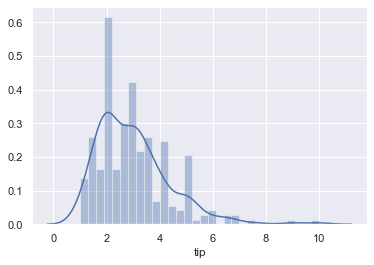

In [22]:
# посмотрим на данные
# bins= 5, 10, 20,30
# почему такая разича в картинках, почему пила, какова причина?
sns.set(); #переводит стили оформления
sns.distplot(tips['tip'], kde=True, bins=30);

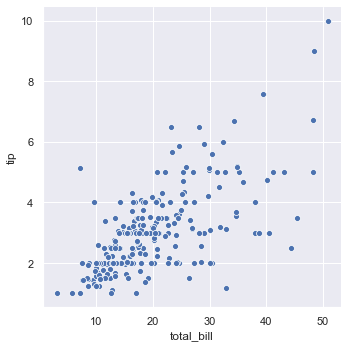

In [23]:
sns.relplot(x="total_bill", y="tip", data=tips);

## Кто больше? Курящие или некурящие?

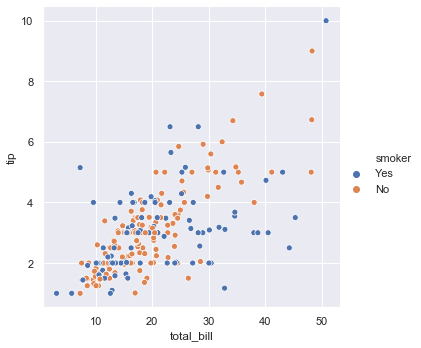

In [24]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

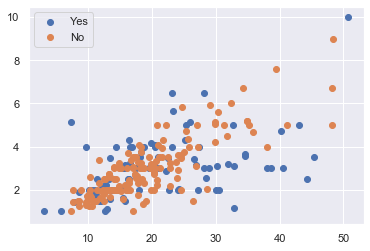

In [40]:
# создать smoker_yes для курящих
smoker_yes = tips[tips['smoker']=='Yes']

# создать smoker_no для некурящих
smoker_no = tips[tips['smoker']=='No']

# создать похожее в matplotlib
fig, ax = plt.subplots()
ax.scatter(x=smoker_yes['total_bill'], y=smoker_yes['tip'], label = 'Yes')
ax.scatter(x=smoker_no['total_bill'], y=smoker_no['tip'], label = 'No')
ax.legend()
plt.show()

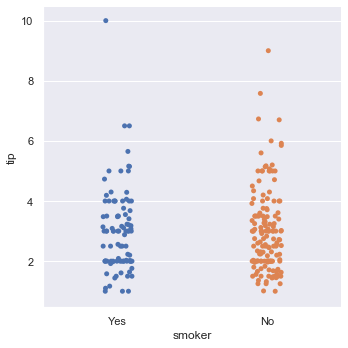

In [41]:
# а так уже проще только в sns
sns.catplot(x="smoker", y="tip", order=["Yes", "No"], data=tips);

## Заглянем глубже
### Посмотрим проценты чаевых от счета

In [44]:
# создадим столбец tip_pct впишем код и посмотрим на 5 первых строк
tips['tip_pct'] = tips['tip']/tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


### Золотое время и в каком зале лучше?

In [47]:
# агрегируем по дням недели и курящим среднею доходность чаевых
group = tips.groupby(['day','smoker'])
group['tip_pct'].mean()

day   smoker
Thur  Yes       0.163863
      No        0.160298
Fri   Yes       0.174783
      No        0.151650
Sat   Yes       0.147906
      No        0.158048
Sun   Yes       0.187250
      No        0.160113
Name: tip_pct, dtype: float64

In [51]:
# агрегируем по дням недели и курящим средний процент чаевых с разбросом
group['tip_pct'].agg([np.mean,np.std])

mean       std
day  smoker                    
Thur Yes     0.163863  0.039389
     No      0.160298  0.038774
Fri  Yes     0.174783  0.051293
     No      0.151650  0.028123
Sat  Yes     0.147906  0.061375
     No      0.158048  0.039767
Sun  Yes     0.187250  0.154134
     No      0.160113  0.042347

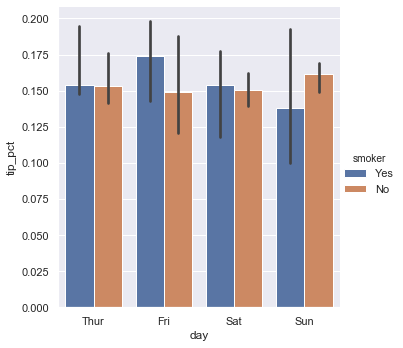

In [58]:
sns.catplot(x="day", y="tip_pct", hue="smoker", data=tips, kind="bar",estimator);

In [ ]:
#стоп, а если разброс нужен не относительно mean а median?
sns.catplot(x="day", y="tip_pct", hue="smoker", data=tips, kind="bar", estimator=np.median);

In [59]:
# агрегируем по значениям и отберем значение счета + проценты 
func = ['count','mean','max']
group['total_bill','tip_pct'].agg(func)

total_bill                   tip_pct                    
                 count       mean    max   count      mean       max
day  smoker                                                         
Thur Yes            17  19.190588  43.11      17  0.163863  0.241255
     No             45  17.113111  41.19      45  0.160298  0.266312
Fri  Yes            15  16.813333  40.17      15  0.174783  0.263480
     No              4  18.420000  22.75       4  0.151650  0.187735
Sat  Yes            42  21.276667  50.81      42  0.147906  0.325733
     No             45  19.661778  48.33      45  0.158048  0.291990
Sun  Yes            19  24.120000  45.35      19  0.187250  0.710345
     No             57  20.506667  48.17      57  0.160113  0.252672

In [60]:
# Сколько было обслужено, и какие чаевые были максимальны?
group['size','tip'].agg({'size':'sum','tip':'max'})

size    tip
day  smoker             
Thur Yes       40   5.00
     No       112   6.70
Fri  Yes       31   4.73
     No         9   3.50
Sat  Yes      104  10.00
     No       115   9.00
Sun  Yes       49   6.50
     No       167   6.00

In [64]:
# статистика по прочентам чаевых (min,max,mean,std) и количество обслуженных
group['tip_pct','size'].agg({'tip_pct':[min,max,np.mean,np.std],'size':sum})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Thur Yes     0.090014  0.241255  0.163863  0.039389   40
     No      0.072961  0.266312  0.160298  0.038774  112
Fri  Yes     0.103555  0.263480  0.174783  0.051293   31
     No      0.120385  0.187735  0.151650  0.028123    9
Sat  Yes     0.035638  0.325733  0.147906  0.061375  104
     No      0.056797  0.291990  0.158048  0.039767  115
Sun  Yes     0.065660  0.710345  0.187250  0.154134   49
     No      0.059447  0.252672  0.160113  0.042347  167

### Рыба моей мечты (лучший клиент)

In [67]:
# проиндексируем средние по дням и курильшикам данные
tips.groupby(['day','smoker'], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Thur,Yes,19.190588,3.030000,2.352941,0.163863
1,Thur,No,17.113111,2.673778,2.488889,0.160298
2,Fri,Yes,16.813333,2.714000,2.066667,0.174783
3,Fri,No,18.420000,2.812500,2.250000,0.151650
4,Sat,Yes,21.276667,2.875476,2.476190,0.147906
5,Sat,No,19.661778,3.102889,2.555556,0.158048
6,Sun,Yes,24.120000,3.516842,2.578947,0.187250
7,Sun,No,20.506667,3.167895,2.929825,0.160113


In [75]:
# найдем три наилучших счета
tips.groupby('smoker')['total_bill'].nlargest(3)

smoker     
Yes     170    50.81
        182    45.35
        102    44.30
No      212    48.33
        59     48.27
        156    48.17
Name: total_bill, dtype: float64

In [78]:
# улучшим вывод через lambda
tips.groupby('smoker').apply(lambda df: df.nlargest(3,'total_bill'))

total_bill    tip     sex smoker  day    time  size   tip_pct
smoker                                                                   
Yes    170       50.81  10.00    Male    Yes  Sat  Dinner     3  0.196812
       182       45.35   3.50    Male    Yes  Sun  Dinner     3  0.077178
       102       44.30   2.50  Female    Yes  Sat  Dinner     3  0.056433
No     212       48.33   9.00    Male     No  Sat  Dinner     4  0.186220
       59        48.27   6.73    Male     No  Sat  Dinner     4  0.139424
       156       48.17   5.00    Male     No  Sun  Dinner     6  0.103799

In [81]:
# еще круче - через собственную функцию
def top_1(df,n=3,columns='total_bill'):
    return df.nlargest(n=n,columns=columns)
tips.groupby('smoker').apply(top_1)

total_bill    tip     sex smoker  day    time  size   tip_pct
smoker                                                                   
Yes    170       50.81  10.00    Male    Yes  Sat  Dinner     3  0.196812
       182       45.35   3.50    Male    Yes  Sun  Dinner     3  0.077178
       102       44.30   2.50  Female    Yes  Sat  Dinner     3  0.056433
No     212       48.33   9.00    Male     No  Sat  Dinner     4  0.186220
       59        48.27   6.73    Male     No  Sat  Dinner     4  0.139424
       156       48.17   5.00    Male     No  Sun  Dinner     6  0.103799

In [82]:
# еще и еще круче - через собственную функцию с начтройками
tips.groupby('smoker').apply(top_1, n=5, columns='tip_pct')  #после функции параметры

total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
Yes    172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
No     232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746

In [90]:
# Найдем клиента дня по размеру чаевых
tips.groupby('day').apply(top_1, n=1, columns='tip')

,,total_bill,tip,sex,smoker,day,time,size,tip_pct
day,,,,,,,,,
Thur,141,34.30,6.70,Male,No,Thur,Lunch,6,0.195335
Fri,95,40.17,4.73,Male,Yes,Fri,Dinner,4,0.117750
Sat,170,50.81,10.00,Male,Yes,Sat,Dinner,3,0.196812
Sun,183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535


In [ ]:
# Найдем клиента дня по проценту от счета
tips.groupby(['smoker','day']).apply( top_tips, n=1, columns ='tip_pct' ) 

## Создадим СВОДНУЮ ТАБЛИЦУ (а как вы думаете в чем отличие?)

In [92]:
tips.pivot_table(index=['smoker','day'])

size       tip   tip_pct  total_bill
smoker day                                           
Yes    Thur  2.352941  3.030000  0.163863   19.190588
       Fri   2.066667  2.714000  0.174783   16.813333
       Sat   2.476190  2.875476  0.147906   21.276667
       Sun   2.578947  3.516842  0.187250   24.120000
No     Thur  2.488889  2.673778  0.160298   17.113111
       Fri   2.250000  2.812500  0.151650   18.420000
       Sat   2.555556  3.102889  0.158048   19.661778
       Sun   2.929825  3.167895  0.160113   20.506667

In [93]:
tips.pivot_table( ['tip_pct','size'],   index=['time','day'],   columns = 'smoker' )

size             tip_pct          
smoker            Yes        No       Yes        No
time   day                                         
Lunch  Thur  2.352941  2.500000  0.163863  0.160311
       Fri   1.833333  3.000000  0.188937  0.187735
Dinner Thur       NaN  2.000000       NaN  0.159744
       Fri   2.222222  2.000000  0.165347  0.139622
       Sat   2.476190  2.555556  0.147906  0.158048
       Sun   2.578947  2.929825  0.187250  0.160113

In [95]:
tips.pivot_table( 'tip_pct',   index=['time','smoker'],   columns = 'day' , aggfunc = 'count' , margins = True )

day            Thur   Fri   Sat   Sun  All
time   smoker                             
Lunch  Yes     17.0   6.0   NaN   NaN   23
       No      44.0   1.0   NaN   NaN   45
Dinner Yes      NaN   9.0  42.0  19.0   70
       No       1.0   3.0  45.0  57.0  106
All            62.0  19.0  87.0  76.0  244

## Кростабуляция (считаем количество)
Почему через кростабуляцию считать лучше?

In [96]:
pd.crosstab([tips.time, tips.smoker], tips.day, margins = True)

day            Thur  Fri  Sat  Sun  All
time   smoker                          
Lunch  Yes       17    6    0    0   23
       No        44    1    0    0   45
Dinner Yes        0    9   42   19   70
       No         1    3   45   57  106
All              62   19   87   76  244

In [103]:
# Хитрый вопрос, а как убрать All снизу, а справа?
pd.crosstab([tips.time, tips.smoker], tips.day, margins = True).iloc[:,:-1]

day            Thur  Fri  Sat  Sun
time   smoker                     
Lunch  Yes       17    6    0    0
       No        44    1    0    0
Dinner Yes        0    9   42   19
       No         1    3   45   57
All              62   19   87   76